In [ ]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##1. Praproses Data

In [ ]:
#Mengunduh Data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OIskHy2jSeCGTcuzpmznXO8qPcvdVPsH' -O DataProd.csv

--2023-04-09 07:12:33--  https://docs.google.com/uc?export=download&id=1OIskHy2jSeCGTcuzpmznXO8qPcvdVPsH
Resolving docs.google.com (docs.google.com)... 173.194.210.139, 173.194.210.102, 173.194.210.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.210.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g1i6edqr851l4kvg147gv84soehqm43v/1681024350000/12463189437916965899/*/1OIskHy2jSeCGTcuzpmznXO8qPcvdVPsH?e=download&uuid=f6bf7f0f-38bc-492f-9461-331c1927f310 [following]
--2023-04-09 07:12:34--  https://doc-0c-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g1i6edqr851l4kvg147gv84soehqm43v/1681024350000/12463189437916965899/*/1OIskHy2jSeCGTcuzpmznXO8qPcvdVPsH?e=download&uuid=f6bf7f0f-38bc-492f-9461-331c1927f310
Resolving doc-0c-bg-docs.googleusercontent.com (doc-0c-bg-docs.googleusercontent.com)... 142.251.162.132, 2607:

In [ ]:
#Membaca Data
prod = pd.read_csv("/content/DataProd.csv")

In [ ]:
#NA to Natural
prod = prod.fillna("Natural")

In [ ]:
#Mengubah Tipe Data Jam dari string menjadi Waktu
prod["Jam_Mulai"] = pd.to_datetime(prod["Jam_Mulai"].astype(str), format='%H.%M')
prod["Jam_Turun"] = pd.to_datetime(prod["Jam_Turun"].astype(str), format='%H.%M')
prod["Jam_Akhir"] = pd.to_datetime(prod["Jam_Akhir"].astype(str), format='%H.%M')

In [ ]:
#Membuat Variabel Lama Roasting dan Lama Mesin Jalan
prod["durasi_roasting"] = ((prod["Jam_Akhir"]-prod["Jam_Turun"]).dt.total_seconds().astype(int))/60

In [ ]:
prod.rename(columns = {'T_Puncak2':'suhu','Moist_0':'moist_0','Moist_N':'moist_N'}, inplace = True)

In [ ]:
# Agar tidak ada yang outlier
prod=prod[prod["durasi_roasting"]<275]

In [ ]:
df_num= prod.drop(columns=['beans_source','product_type','is_alkalized','batch_id',"batch_id","date","Jam_Mulai","Jam_Turun","Jam_Akhir","T_Puncak1"])
df_cat= prod[['beans_source','product_type','is_alkalized','suhu','durasi_roasting']]

In [ ]:
# One-hot Encoding pada Variabel Kategorik
cat_features = ['beans_source', 'product_type']
for feature in cat_features:
    a = pd.get_dummies(prod[feature], prefix = feature).astype(int)
    frames = [prod, a]
    prod = pd.concat(frames, axis = 1)
prod.drop(cat_features, axis = 1, inplace=True)

In [ ]:
#Menghapus Beberapa Kolom yang Tidak Berguna
deleted = ["batch_id","date","Jam_Mulai","Jam_Turun","Jam_Akhir","T_Puncak1"]
df = prod.drop(columns=deleted)

In [ ]:
df.rename(columns = {'T_Puncak2':'suhu','Moist_0':'moist_0','Moist_N':'moist_N'}, inplace = True)
df_num.rename(columns = {'T_Puncak2':'suhu','Moist_0':'moist_0','Moist_N':'moist_N'}, inplace = True)

## 2. EDA

In [ ]:
def plot_line(x_,y_) :
  xx=df[x_]
  yy=df[y_]

  m, b = np.polyfit(xx, yy, 1)
  df.plot.scatter(x=x_, y=y_)
  plt.plot(xx, m*xx + b, color ="red")
  plt.grid()
  plt.title(str(y_)+" terhadap " +str(x_))

In [ ]:
x_num = ['nibs_capacity', 'solution_load', 'pH_0', 'pH_N', 'delta_pH', 'moist_0',
       'moist_N', 'delta_moist']

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


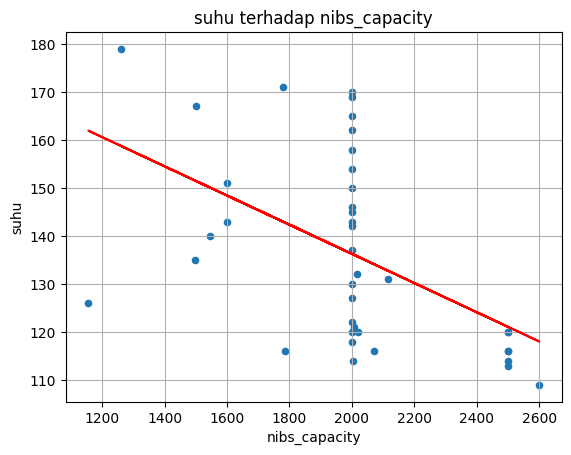

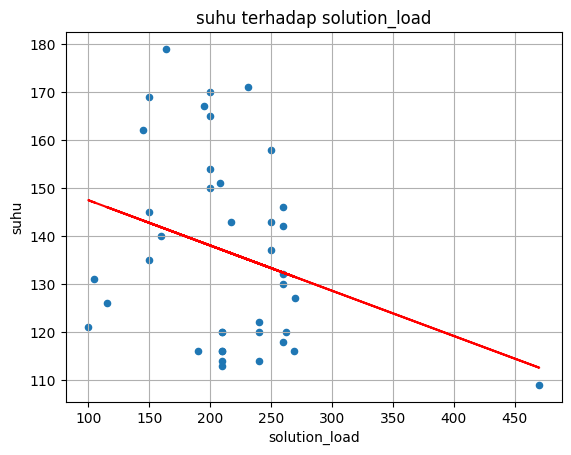

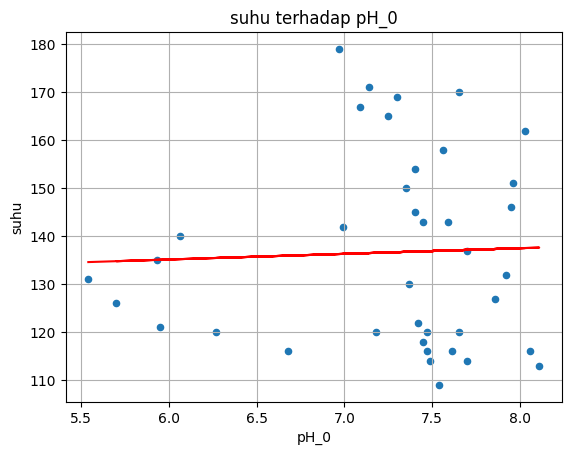

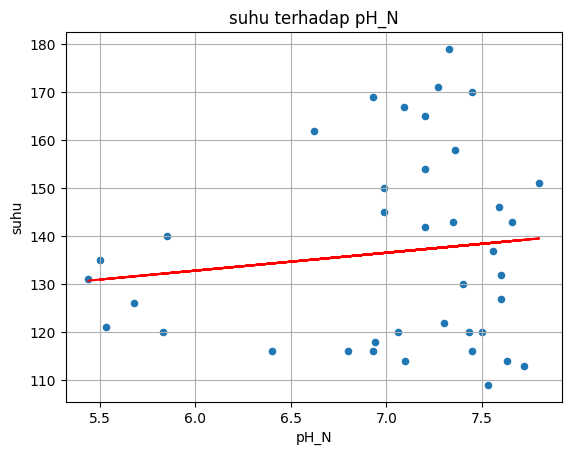

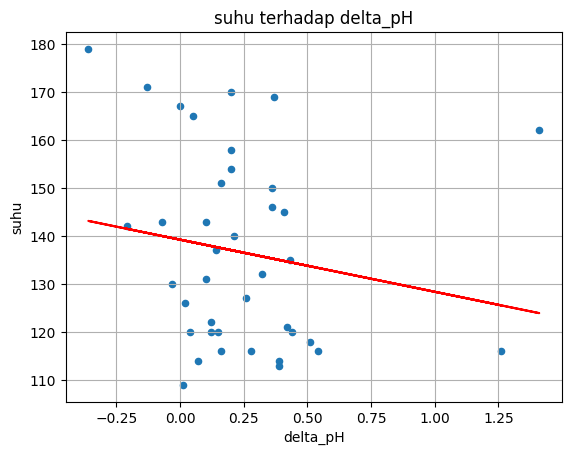

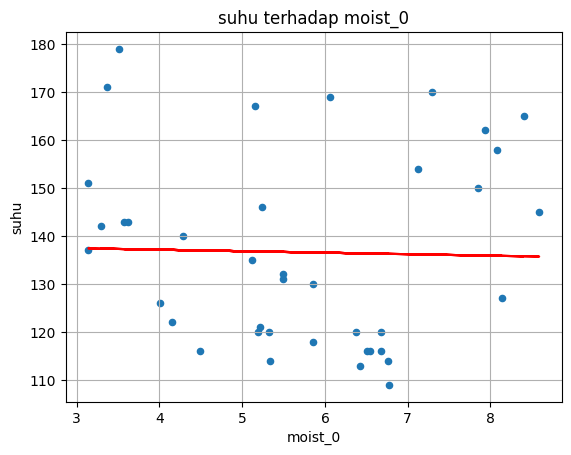

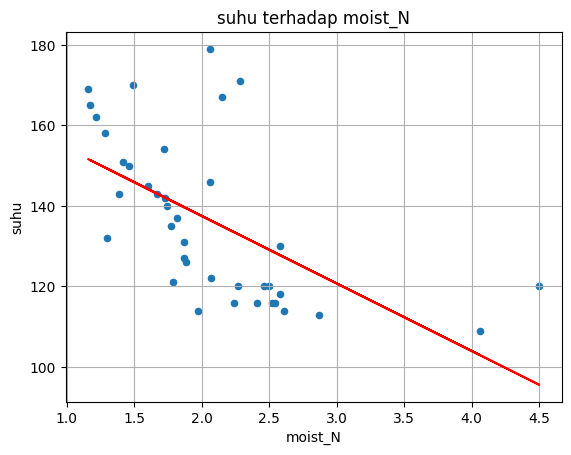

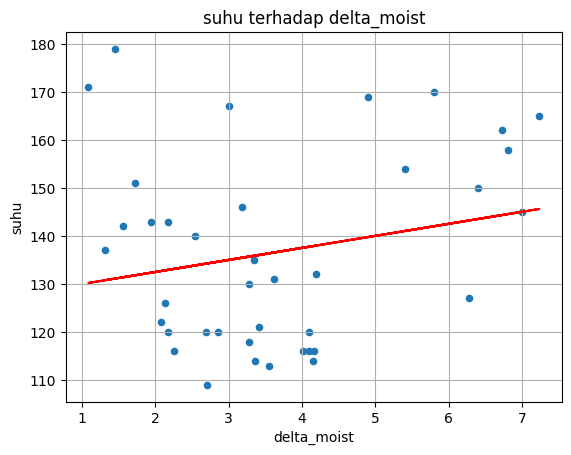

In [ ]:
for x in x_num :
  plot_line(x,"suhu")

In [ ]:
def mean_plot (df,x,y,r) :
  x1 = df.groupby(x).median().reset_index()
  plt.grid()
  plt.bar(range(len(x1)), x1[y])
  plt.xticks(range(len(x1)), x1[x],rotation=r)
  plt.xlabel(x)
  plt.ylabel('Median of '+y)
  plt.title("Median "+y+" terhadap "+x)

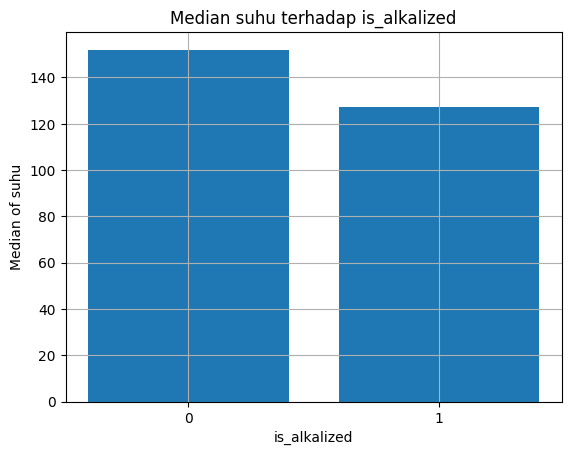

In [ ]:
mean_plot(df,"is_alkalized","suhu",0)

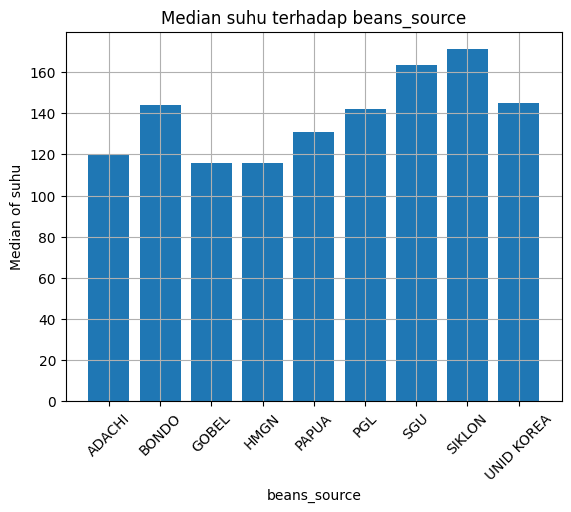

In [ ]:
mean_plot(df_cat,"beans_source","suhu",45)

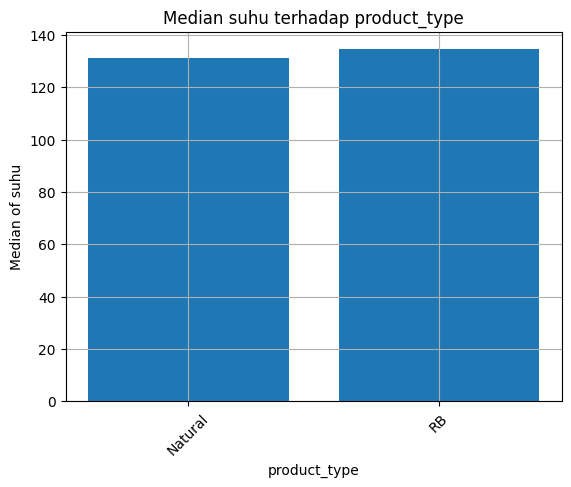

In [ ]:
mean_plot(df_cat,"product_type","suhu",45)

## 3. Uji korelasi dan seleksi fitur

<ipython-input-20-05f7d88231eb>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_num.corr(), dtype=np.bool)


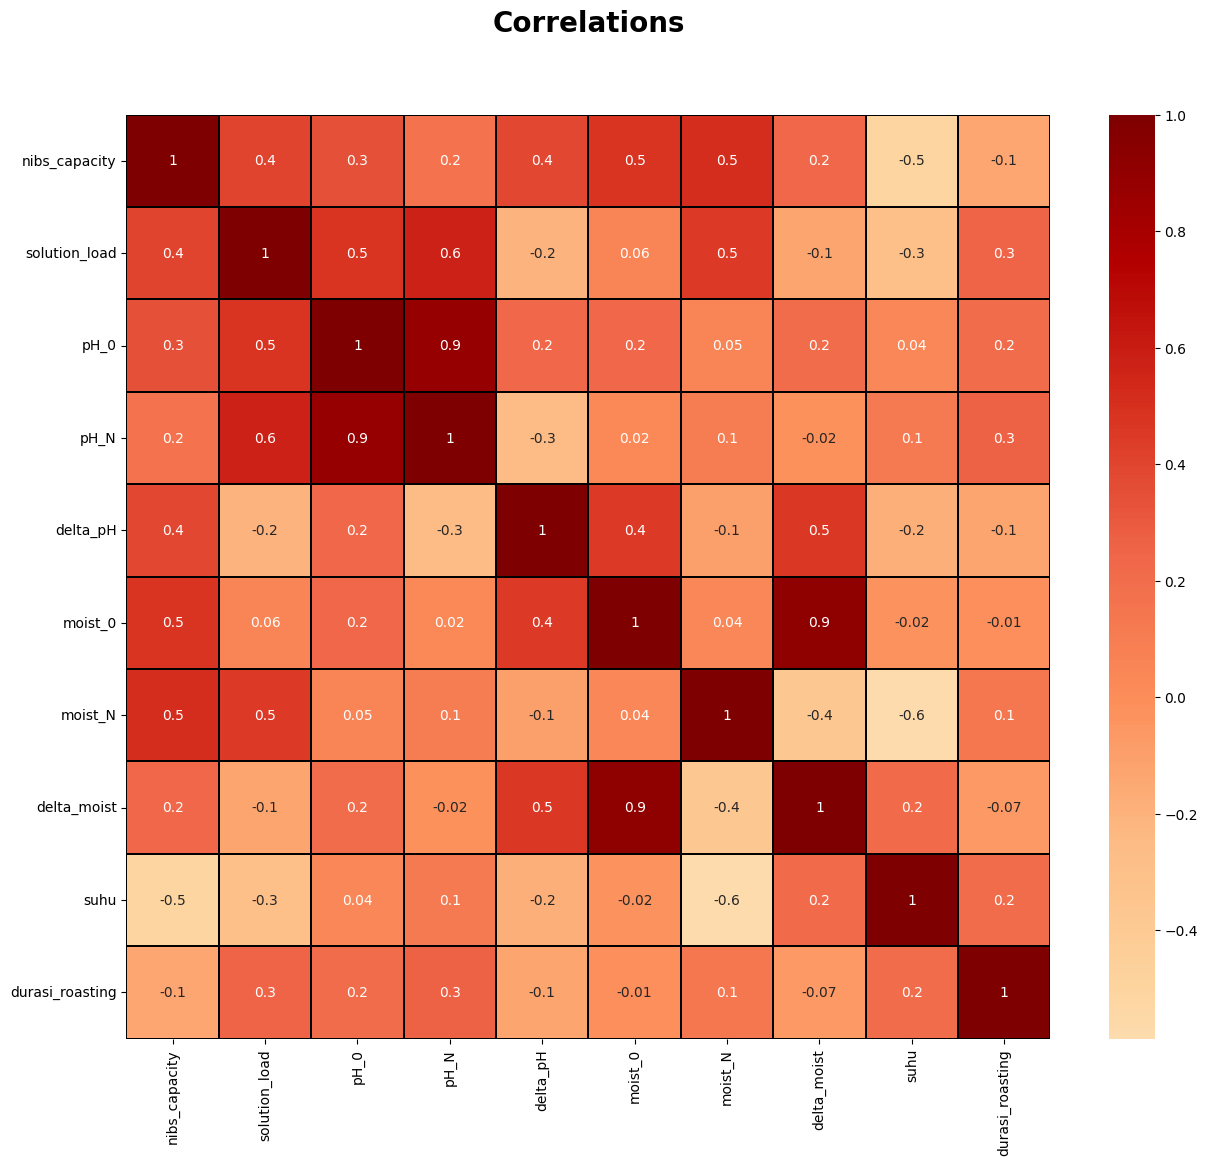

In [ ]:
mask = np.zeros_like(df_num.corr(), dtype=np.bool)
## in order to reverse the bar replace "RdBu" with "RdBu_r"
plt.subplots(figsize = (15,12))
sns.heatmap(df_num.corr(), annot=True,mask = False,cmap = 'OrRd', linewidths=.2, linecolor='black',fmt='.1g',center = 0,square=True)

plt.title("Correlations", y = 1.03,fontsize = 20, fontweight = 'bold', pad = 40);

### 3.1 Uji Korelasi Variabel Numerik

In [ ]:

from scipy import stats

X = df.drop(columns=['suhu','durasi_roasting'])
y = df[["suhu","durasi_roasting"]]

x_num = ['nibs_capacity', 'solution_load', 'pH_0', 'pH_N', 'delta_pH', 'moist_0',
       'moist_N', 'delta_moist']

corr_df = pd.DataFrame()
corr_df ["Variabel"] = x_num

r=[]
pvalue = []
for x in x_num : 
  a,b = stats.pearsonr(X[x],y["suhu"])
  r.append(a)
  pvalue.append(b)

corr_df["r_suhu"] = r
corr_df["pvalue_suhu"] = pvalue

In [ ]:
corr_df

,Variabel,r_suhu,pvalue_suhu
0,nibs_capacity,-0.508903,0.000939
1,solution_load,-0.296169,0.067144
2,pH_0,0.039244,0.812503
3,pH_N,0.125094,0.447984
4,delta_pH,-0.177148,0.280652
5,moist_0,-0.024790,0.880922
6,moist_N,-0.585982,0.000089
7,delta_moist,0.215548,0.187553


In [ ]:
corr_df.to_excel('/content/drive/MyDrive/Data Skripsi/table result/corr_test.xlsx',index=False)

OSError: ignored

### 3.2 Uji F Variabel Kategorik

In [ ]:
df_cat = df_cat[["beans_source","product_type","is_alkalized"]]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for x in ["beans_source","product_type","is_alkalized"] :
  df_cat[x] = le.fit_transform(df_cat[x])

#ANOVA test
from sklearn.feature_selection import f_regression

f_score, p_value = f_regression(df_cat,y["suhu"])
f_test = pd.DataFrame()
f_test["Variabel"] = df_cat.columns
f_test["fscore_suhu"] = f_score
f_test["pvalue_suhu"] = p_value
#f_test = f_test.sort_values(by=["f_score"],ascending=False)
f_test

# # # Hasil nilai F-Score
# # sns.barplot(x ='f_score', y='Variabel',data = f_test)

<ipython-input-24-1a8da03ee902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[x] = le.fit_transform(df_cat[x])
<ipython-input-24-1a8da03ee902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[x] = le.fit_transform(df_cat[x])
<ipython-input-24-1a8da03ee902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Variabel,fscore_suhu,pvalue_suhu
0,beans_source,29.522289,0.000004
1,product_type,0.512261,0.478655
2,is_alkalized,6.490727,0.015131


In [ ]:
f_test.to_excel('/content/drive/MyDrive/Data Skripsi/table result/f_test.xlsx',index=False)

## 4. Modelling

In [ ]:
desel_num = np.array(corr_df[corr_df["pvalue_suhu"]>0.01]["Variabel"])
desel_cat =['product_type_RB',
       'product_type_Natural',
        "is_alkalized"]

In [ ]:
desel = np.concatenate((desel_num,desel_cat))

In [ ]:
df=df.drop(columns=desel)
df=df.sample(len(df),random_state=1234)

In [ ]:
X = df.drop(columns=['suhu'])
y = df[["suhu"]]

In [ ]:
X.columns

Index(['nibs_capacity', 'moist_N', 'durasi_roasting', 'beans_source_ADACHI',
       'beans_source_BONDO', 'beans_source_GOBEL', 'beans_source_HMGN',
       'beans_source_PAPUA', 'beans_source_PGL', 'beans_source_SGU',
       'beans_source_SIKLON', 'beans_source_UNID KOREA'],
      dtype='object')

In [ ]:
# Normaliasi
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(X)
X[X.columns] = X_norm

In [ ]:
from sklearn.model_selection import train_test_split

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=1234)

In [ ]:
#Data Preprocessing and Algebra
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#Machine Learning and Evaluation Model
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer,  mean_absolute_percentage_error

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###4.1 SVR

####4.1.1 Tunning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

param_grid = {'C': [0.1, 0.001, 1, 10, 12, 14, 16, 18, 20, 22],
            'gamma': [0.001, 0.01, 0.1, 1, 2, 5],
            'epsilon': [0.001, 0.01, 0.1, 1, 2, 4],
            'kernel': ("rbf", "poly", "linear")}
search = GridSearchCV(SVR(), param_grid, 
                         cv = 3, n_jobs = -1, verbose = 1000, scoring="neg_mean_squared_error")
search.fit(X, y)
print(search.best_params_)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
{'C': 22, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4.1.2 Cross-Validation

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


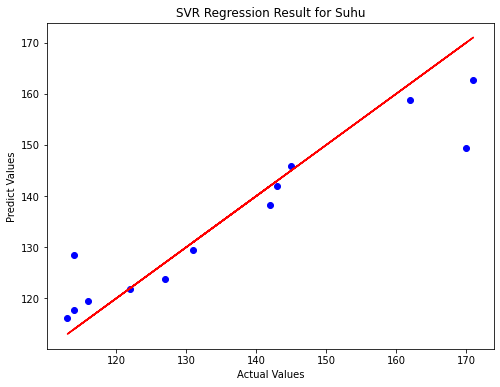

MAPE Suhu : 3.7155589810121827
RMSE Suhu : 7.724772791507795


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


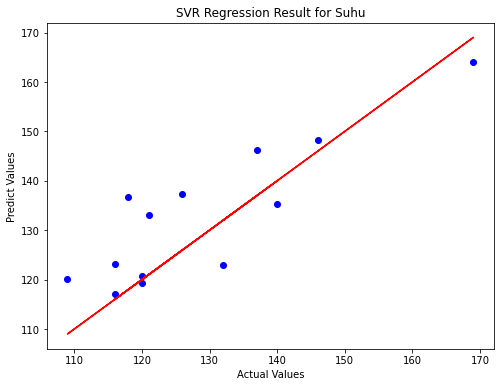

MAPE Suhu : 5.731466636210572
RMSE Suhu : 8.85414984611278


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


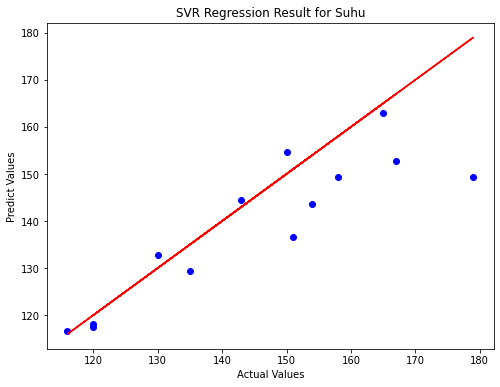

MAPE Suhu : 4.845263095725084
RMSE Suhu : 10.93884762857164

-----
3-Fold Cross Vaidation
MAPE Suhu : 4.764096237649279
RMSE Suhu : 9.172590088730738


In [ ]:
KFold_ = KFold(n_splits=3,shuffle=True, random_state=1234)
kfold = KFold_.split(X, y)
rmse_data = []
mape_data = []

for k, (train, test) in enumerate(kfold):
  X_train = X.iloc[train, :]
  y_train = y.iloc[train]

  X_test = X.iloc[test, :]
  y_test = y.iloc[test]

  param = {'C': 22, 'epsilon': 1, 'gamma': 1, 'kernel': 'rbf'}
  model = SVR(**param)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)


  # Aktual vs Prediksi non FS
  fig, ax1 = plt.subplots(figsize=(8,6))
  plt.scatter(y_test,y_pred,color='blue')
  plt.plot(y_test,y_test,color='red')
  plt.title('SVR Regression Result for Suhu')
  plt.xlabel('Actual Values')
  plt.ylabel('Predict Values')
  plt.show()
  plt.close()


  #root_mean_squared_error (RMSE)
  rmse_suhu = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_data.append(rmse_suhu)
  #MAPE
  mape_suhu = mean_absolute_percentage_error(y_test, y_pred)
  mape_data.append(mape_suhu*100)

  print("MAPE Suhu : " + str(mape_suhu*100))
  print("RMSE Suhu : " + str(rmse_suhu))

print("")
print("-----")
print("3-Fold Cross Vaidation")
print("MAPE Suhu : "+str(np.array(mape_data).mean()))
print("RMSE Suhu : "+str(np.array(rmse_data).mean()))
# print("MAPE Durasi : "+str(np.array(mape_data_).mean()))
# print("RMSE Durasi : "+str(np.array(rmse_data_).mean()))

In [ ]:
svm_mape = mape_data
svm_rmse = rmse_data

### 4.2 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
X

,nibs_capacity,moist_N,durasi_roasting,beans_source_ADACHI,beans_source_BONDO,beans_source_GOBEL,beans_source_HMGN,beans_source_PAPUA,beans_source_PGL,beans_source_SGU,beans_source_SIKLON,beans_source_UNID KOREA
12,0.584488,0.152695,0.653061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42,0.664820,0.212575,0.210884,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.930748,0.407186,0.258503,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.584488,0.017964,0.700680,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.584488,0.098802,0.374150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
35,0.270083,0.173653,0.251701,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24,0.598338,0.332335,0.265306,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.930748,0.511976,0.374150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,0.930748,0.434132,0.176871,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.584488,0.269461,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X.columns

Index(['nibs_capacity', 'moist_N', 'durasi_roasting', 'beans_source_ADACHI',
       'beans_source_BONDO', 'beans_source_GOBEL', 'beans_source_HMGN',
       'beans_source_PAPUA', 'beans_source_PGL', 'beans_source_SGU',
       'beans_source_SIKLON', 'beans_source_UNID KOREA'],
      dtype='object')

In [ ]:
model.coef_

array([[ -6.35653468, -15.98967507, -16.97572115, -18.2629075 ,
          0.10434811, -19.45812152, -17.17979584, -13.08426694,
          2.3406475 ,  21.89319064,  36.41704335,   7.22986218]])

In [ ]:
model.intercept_

array([153.84067811])

#### 4.2.2 Cross-Validation

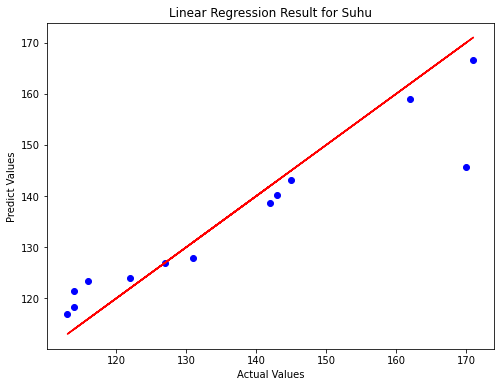

MAPE Suhu : 3.7261363701731804
RMSE Suhu : 7.829232590617766


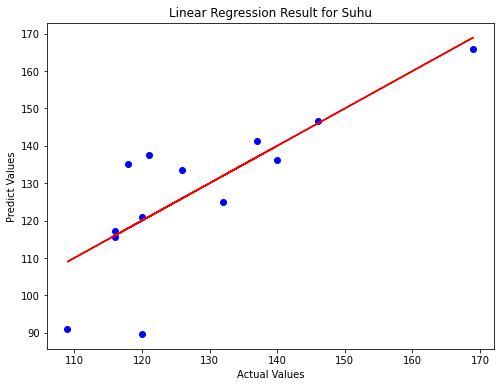

MAPE Suhu : 7.066577074563632
RMSE Suhu : 12.319234581342627


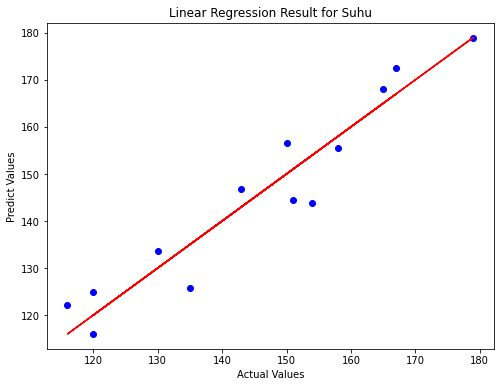

MAPE Suhu : 3.6259240077902226
RMSE Suhu : 5.73291415735236

-----
3-Fold Cross Vaidation
MAPE Suhu : 4.806212484175679
RMSE Suhu : 8.627127109770917


In [ ]:
KFold_ = KFold(n_splits=3,shuffle=True, random_state=1234)
kfold = KFold_.split(X, y)
rmse_data = []
mape_data = []
params = []

for k, (train, test) in enumerate(kfold):
  X_train = X.iloc[train, :]
  y_train = y.iloc[train]

  X_test = X.iloc[test, :]
  y_test = y.iloc[test]

  #mlp = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(50, 2),max_iter=10000)
  model = model.fit(X_train,y_train)
  y_pred = model.predict(X_test)


  # Aktual vs Prediksi non FS
  fig, ax1 = plt.subplots(figsize=(8,6))
  plt.scatter(y_test,y_pred,color='blue')
  plt.plot(y_test,y_test,color='red')
  plt.title('Linear Regression Result for Suhu')
  plt.xlabel('Actual Values')
  plt.ylabel('Predict Values')
  plt.show()
  plt.close()


  #root_mean_squared_error (RMSE)
  rmse_suhu = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_data.append(rmse_suhu)
  #MAPE
  mape_suhu = mean_absolute_percentage_error(y_test, y_pred)
  mape_data.append(mape_suhu*100)

  print("MAPE Suhu : " + str(mape_suhu*100))
  print("RMSE Suhu : " + str(rmse_suhu))

print("")
print("-----")
print("3-Fold Cross Vaidation")
print("MAPE Suhu : "+str(np.array(mape_data).mean()))
print("RMSE Suhu : "+str(np.array(rmse_data).mean()))
# print("Best Param : "+str(params[np.argmin(mape_data)]))
# mlp_params = params[np.argmin(mape_data)]
# print("MAPE Durasi : "+str(np.array(mape_data_).mean()))
# print("RMSE Durasi : "+str(np.array(rmse_data_).mean()))

In [ ]:
lr_mape = mape_data
lr_rmse = rmse_data

### 4.3 ELM

In [ ]:
import scipy

def elm_fit(X_train,y_train,n) :
  #1. Definisiin banyaknya variabel (m) dan jumlah hidden node (n)
  m = X_train.shape[1]
  W_train = abs(np.random.normal(size=[m,n])) #InputWeightLatih

  #2. Operasi dot X_train dengan W_train
  h_train = np.dot(X_train, W_train)

  #3. Masukin h_train ke relu
  H_train = np.maximum(h_train, 0, h_train)

  #4. Mencari Beta Latih
  H_train_inv = scipy.linalg.pinv(H_train)
  B_train = np.dot(H_train_inv,y_train)
  #np.save("B_train_"+str(N)+".npy", B_train)
  return W_train, B_train

def elm_predict(X_test,W_train,B_train) :
  #5. Uji
  h_test = np.dot(X_test,W_train) #hasil dot product dari X_test dan W_train
  H_test = np.maximum(h_test, 0, h_test) #hasil relu
  y_pred = np.dot(H_test, B_train) #hasil prediksi
  return y_pred

#### 4.3.1 Tunning

In [ ]:
from sklearn.model_selection import train_test_split

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=1234)

In [ ]:
node = [5,10,20,30,40,50,60,70,80,90,100,150,200,300,400,500,600,700,1000]
mape = []
W_train__ = []
for x in node :
  a,b = elm_fit(X_train,y_train,x)
  y_pred = elm_predict(X_test,a,b)
  W_train__.append(a)
  mape.append(mean_absolute_percentage_error(y_test,y_pred))

print("Best Node is "+str(node[np.argmin(mape)]))
print("With score mape = "+str(min(mape)*100))
best_w = W_train__[np.argmin(mape)]

Best Node is 100
With score mape = 3.69678255727411


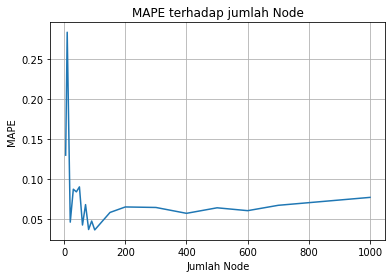

In [ ]:
plt.title("MAPE terhadap jumlah Node")
plt.xlabel("Jumlah Node")
plt.ylabel("MAPE")
plt.grid()

plt.plot(node,mape)

#### 4.3.2 Cross-Validation

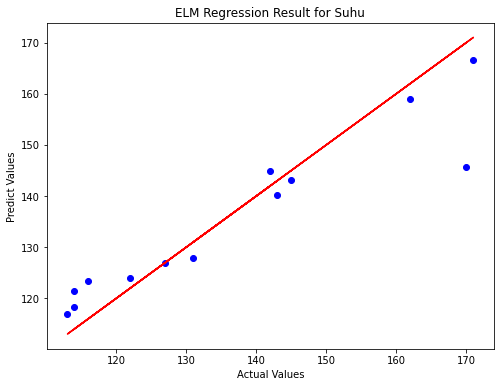

MAPE Suhu : 3.69678255727408
RMSE Suhu : 7.812850468225936


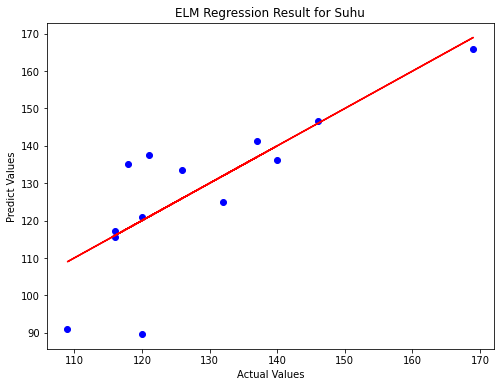

MAPE Suhu : 7.066577074563638
RMSE Suhu : 12.31923458134267


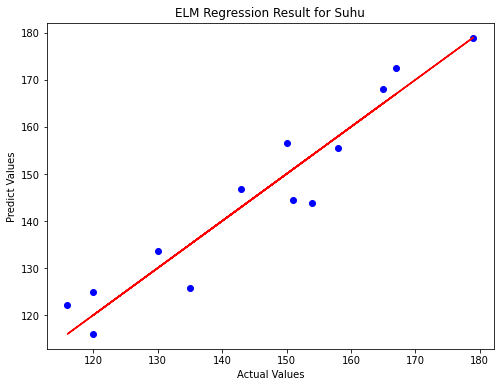

MAPE Suhu : 3.6259240077901613
RMSE Suhu : 5.732914157352316

-----
3-Fold Cross Vaidation
MAPE Suhu : 4.796427879875959
RMSE Suhu : 8.621666402306973


In [ ]:
KFold_ = KFold(n_splits=3,shuffle=True, random_state=1234)
kfold = KFold_.split(X, y)
rmse_data = []
mape_data = []
params = []

for k, (train, test) in enumerate(kfold):
  X_train = X.iloc[train, :]
  y_train = y.iloc[train]

  X_test = X.iloc[test, :]
  y_test = y.iloc[test]

  #1. Definisiin banyaknya variabel (m) dan jumlah hidden node (n)
  m = X_train.shape[1]
  W_train = best_w
  #2. Operasi dot X_train dengan W_train
  h_train = np.dot(X_train, W_train)

  #3. Masukin h_train ke relu
  H_train = np.maximum(h_train, 0, h_train)

  #4. Mencari Beta Latih
  H_train_inv = scipy.linalg.pinv(H_train)
  B_train = np.dot(H_train_inv,y_train)

  h_test = np.dot(X_test,W_train) #hasil dot product dari X_test dan W_train
  H_test = np.maximum(h_test, 0, h_test) #hasil relu
  y_pred = np.dot(H_test, B_train) #hasil prediksi

  mape.append(mean_absolute_percentage_error(y_test,y_pred))


  # Aktual vs Prediksi non FS
  fig, ax1 = plt.subplots(figsize=(8,6))
  plt.scatter(y_test,y_pred,color='blue')
  plt.plot(y_test,y_test,color='red')
  plt.title('ELM Regression Result for Suhu')
  plt.xlabel('Actual Values')
  plt.ylabel('Predict Values')
  plt.show()
  plt.close()


  #root_mean_squared_error (RMSE)
  rmse_suhu = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_data.append(rmse_suhu)
  #MAPE
  mape_suhu = mean_absolute_percentage_error(y_test, y_pred)
  mape_data.append(mape_suhu*100)

  print("MAPE Suhu : " + str(mape_suhu*100))
  print("RMSE Suhu : " + str(rmse_suhu))

print("")
print("-----")
print("3-Fold Cross Vaidation")
print("MAPE Suhu : "+str(np.array(mape_data).mean()))
print("RMSE Suhu : "+str(np.array(rmse_data).mean()))
# print("Best Param : "+str(params[np.argmin(mape_data)]))
# mlp_params = params[np.argmin(mape_data)]
# print("MAPE Durasi : "+str(np.array(mape_data_).mean()))
# print("RMSE Durasi : "+str(np.array(rmse_data_).mean()))

In [ ]:
elm_mape = mape_data
elm_rmse = rmse_data

In [ ]:
np.save("/content/drive/MyDrive/Data Skripsi/W_best_ELM.npy", best_w)

### 4.4 PSO-ELM

In [ ]:
import scipy

def elm_fit(X_train,y_train,W_train, n) :
  #1. Definisiin banyaknya variabel (m) dan jumlah hidden node (n)
  m = X_train.shape[1]
  W_train = abs(np.random.normal(size=[m,n])) #InputWeightLatih

  #2. Operasi dot X_train dengan W_train
  h_train = np.dot(X_train, W_train)+bias

  #3. Masukin h_train ke relu
  H_train = np.maximum(h_train, 0, h_train)

  #4. Mencari Beta Latih
  H_train_inv = scipy.linalg.pinv(H_train)
  B_train = np.dot(H_train_inv,y_train)
  #np.save("B_train_"+str(N)+".npy", B_train)
  return W_train, B_train

def elm_predict(X_test,W_train,B_train) :
  #5. Uji
  h_test = np.dot(X_test,W_train)+bias #hasil dot product dari X_test dan W_train
  H_test = np.maximum(h_test, 0, h_test) #hasil relu
  y_pred = np.dot(H_test, B_train) #hasil prediksi
  return y_pred

#### 4.4.1 Tunning

In [ ]:
# Membuat Fungsi Objektif
def obj(bias,W_train) :
  KFold_ = KFold(n_splits=3,shuffle=True, random_state=1234)
  kfold = KFold_.split(X, y)
  rmse_data = []
  mape_data = []

  for k, (train, test) in enumerate(kfold):
    X_train = X.iloc[train, :]
    y_train = y.iloc[train]

    X_test = X.iloc[test, :]
    y_test = y.iloc[test]

    #1. Definisiin banyaknya variabel (m) dan jumlah hidden node (n)
    m = X_train.shape[1]
    #W_train = abs(np.random.normal(size=[m,n])) #InputWeightLatih

    #2. Operasi dot X_train dengan W_train
    h_train = np.dot(X_train, W_train)+bias

    #3. Masukin h_train ke relu
    H_train = np.maximum(h_train, 0, h_train)

    #4. Mencari Beta Latih
    H_train_inv = scipy.linalg.pinv(H_train)
    B_train = np.dot(H_train_inv,y_train)
    #np.save("B_train_"+str(N)+".npy", B_train)
    
    h_test = np.dot(X_test,W_train)+bias #hasil dot product dari X_test dan W_train
    H_test = np.maximum(h_test, 0, h_test) #hasil relu
    y_pred = np.dot(H_test, B_train) #hasil prediksi

    #Scoring
    #root_mean_squared_error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_data.append(rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test,y_pred)
    mape_data.append(mape*100)

  return np.array(rmse_data).mean()

In [ ]:
import random 

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity

In [ ]:
def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle

In [ ]:
def pso(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness

  # bias = x0[i][0]
  # w = x0[i][1:m]
  # W_train = np.resize(x0[i][1:m],(X.shape[1],N))

  pbest_fitness = []
  for i in range(0,population):
    bias = particles[i][0]
    w = particles[i][1:m]
    W_train = np.resize(w,(X.shape[1],N))
    y_ = obj(bias,W_train)
    pbest_fitness.append(y_)
  # [fitness_function(p[0],np.resize(p[1:m],(X.shape[1],N))) for p in particles]
  # print(pbest_fitness)
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]
  
  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = []
    for i in range(0,population):
      bias = particles[i][0]
      w = particles[i][1:m]
      W_train = np.resize(w,(X.shape[1],N))
      y_ = obj(bias,W_train)
      pbest_fitness.append(y_)
    print(min(pbest_fitness))
    # print(pbest_fitness)
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]

  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)
  return(gbest_position)

In [ ]:
#Step 1 Initialization

import random 

N = 100 #Jumlah Node

m = X.shape[1]*N+1
n = 10
Wmax = 0.9
Wmin = 0.4
c1 = 2
c2 = 2
MaxIteration = 50

x0 = np.zeros((n, m))


LB_w= np.zeros((m-1)) #Nilai Awal
UB_w = np.ones((m-1)) #Nilai Akhir

LB=np.append(np.array([0]),LB_w)
UB=np.append(np.array([10]),UB_w)

for i in range (0,n):
  for j in range(0,m):
    x0[i][j] = LB[j]+random.random()*(UB[j]-LB[j])

v = 0.1*x0
x0 = x0 + v

In [ ]:
#Step 2 fitting for t initialization
result_0 = []
for i in range(0,n):
  bias = x0[i][0]
  w = x0[i][1:m]
  W_train = np.resize(w,(X.shape[1],N))
  y_ = obj(bias,W_train)
  result_0.append(y_)
index_min_0 = np.argmin(result_0)

In [ ]:
result_before = result_0
x_before = x0
gbest_before = x0[index_min_0]
xbest = np.zeros((n, m))
a=1
p=0

iter=100

result_gbest=[]
gbest_ = []
iterr = []
best_score = []
for p in range(0,iter) :
  for i in range (0,n):
    for j in range(0,m):
      if p == 0 :
        v[i][j] = Wmax*v[i][j]+c1*random.random()*(x0[i][j]-x0[i][j]) + c2*random.random()*(x0[index_min_0][j]-x0[i][j])
      else :
        v[i][j] = Wmax*v[i][j]+c1*random.random()*(xbest[i][j]-x_[i][j]) + c2*random.random()*(gbest[j]-x_[i][j])    

  x_=x_before+v

  result = []
  for i in range(0,n):
    bias = x_[i][0]
    w = x_[i][1:m]
    W_train = np.resize(w,(X.shape[1],N))
    y_ = obj(bias,W_train)
    result.append(y_)
  
  # print("Before " + str(min(result_before)))
  # print("After " + str(min(result)))
  # #print(np.argmin(result))

  #xbest
  for i in range(0,n):
    if result[i]<result_before[i]:
      xbest[i] = x_[i]
      #print(str(i)+" update")
    else:
      xbest[i] = x_before[i]
      #print(str(i)+" not-update")
  
  # print(min(result))
  # print(np.argmin(result))

  # result_gbest = []
  # for i in range(0,n):
  #   bias = gbest_before[i][0]
  #   w = xbest[i][1:m]
  #   W_train = np.resize(w,(X_train.shape[1],N))
  #   y_ = obj(bias,W_train)
  #   result_gbest.append(y_)
  
  bias = gbest_before[0]
  w = gbest_before[1:m]
  W_train = np.resize(w,(X.shape[1],N))
  result_gbest = obj(bias,W_train)

  #gbest
  for i in range(0,n):
    if result[i]<result_gbest :
      gbest = x_[np.argmin(result)]
    else :
      gbest = gbest_before

  # if min(result_xbest)<min(result_before) :
  #   gbest = xbest[np.argmin(result_xbest)]
  #   # print("Update")
  #   # print(gbest[0])
  # else:
  #   gbest = gbest_before
  #   # print("Non-Update")
  #   # print(gbest[0])

  #gbest_.append(gbest)

  bias = gbest[0]
  w = gbest[1:m]
  W_train = np.resize(w,(X.shape[1],N))
  error = obj(bias,W_train)
  #result_gbest.append(error)
  
  # print(abs(error))
  # if abs(error) <= abs(0.2):
  #   break
  
  result_before = result
  x_before = x_
  gbest_before = gbest
  p=p+1
  print("Error iterasi ke-"+str(p)+" "+str(error))
  iterr.append(p)
  best_score.append(error)

Error iterasi ke-1 8.61072694463101
Error iterasi ke-2 8.61072694463101
Error iterasi ke-3 8.609380176237293
Error iterasi ke-4 8.609380176237293
Error iterasi ke-5 8.609380176237293
Error iterasi ke-6 8.609380176237293
Error iterasi ke-7 8.609380176237293
Error iterasi ke-8 8.609380176237293
Error iterasi ke-9 8.609380176237293
Error iterasi ke-10 8.609380176237293
Error iterasi ke-11 8.609380176237293
Error iterasi ke-12 8.609380176237293
Error iterasi ke-13 8.609380176237293
Error iterasi ke-14 8.609380176237293
Error iterasi ke-15 8.609380176237293
Error iterasi ke-16 8.609380176237293
Error iterasi ke-17 8.609380176237293
Error iterasi ke-18 8.609380176237293
Error iterasi ke-19 8.609380176237293
Error iterasi ke-20 8.608968321376762
Error iterasi ke-21 8.080860574895599
Error iterasi ke-22 8.080860574895599
Error iterasi ke-23 8.080860574895599
Error iterasi ke-24 8.080860574895599
Error iterasi ke-25 8.080860574895599
Error iterasi ke-26 8.080860574895599
Error iterasi ke-27 8.0

In [ ]:
bias_ = gbest[0]
w = gbest[1:m]
W_train_ = np.resize(w,(X.shape[1],N))

In [ ]:
np.save("/content/drive/MyDrive/Data Skripsi/GBest_PSO-ELM.npy", gbest)

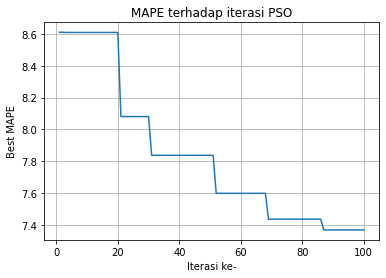

In [ ]:
plt.title("MAPE terhadap iterasi PSO")
plt.xlabel("Iterasi ke-")
plt.ylabel("Best MAPE")
plt.grid()

plt.plot(iterr,best_score)

#### 4.4.2 Cross-Validation

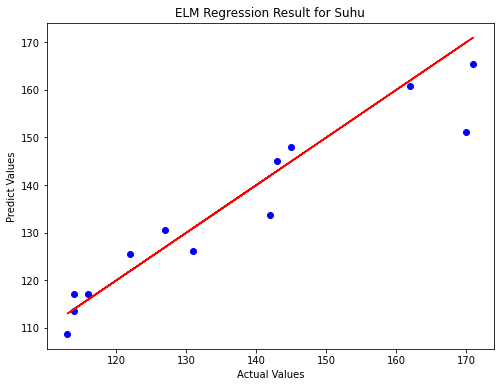

MAPE Suhu : 3.209682072378133
RMSE Suhu : 6.48275746812313


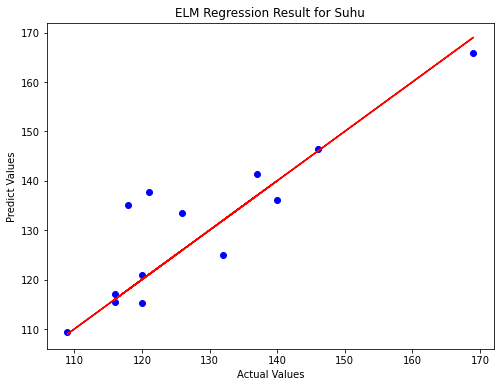

MAPE Suhu : 4.187121424821731
RMSE Suhu : 7.588610144227355


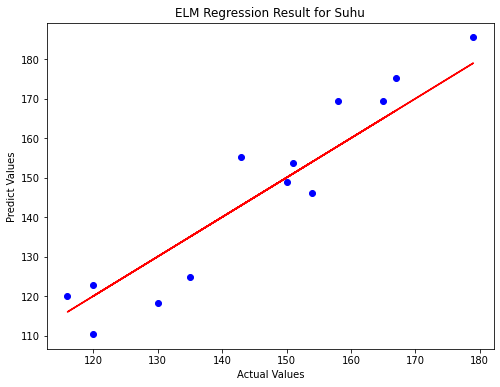

MAPE Suhu : 5.014269232690593
RMSE Suhu : 8.033496433195706

-----
3-Fold Cross Vaidation
MAPE Suhu : 4.1370242432968185
RMSE Suhu : 7.368288015182064


In [ ]:
KFold_ = KFold(n_splits=3,shuffle=True, random_state=1234)
kfold = KFold_.split(X, y)
rmse_data = []
mape_data = []
params = []

for k, (train, test) in enumerate(kfold):
  X_train = X.iloc[train, :]
  y_train = y.iloc[train]

  X_test = X.iloc[test, :]
  y_test = y.iloc[test]

  #1. Definisiin banyaknya variabel (m) dan jumlah hidden node (n)
  m = X_train.shape[1]
  n = 50
  W_train = W_train_

  #2. Operasi dot X_train dengan W_train
  h_train = np.dot(X_train, W_train)+bias_

  #3. Masukin h_train ke relu
  H_train = np.maximum(h_train, 0, h_train)

  #4. Mencari Beta Latih
  H_train_inv = scipy.linalg.pinv(H_train)
  B_train = np.dot(H_train_inv,y_train)
  #np.save("B_train_"+str(N)+".npy", B_train)
  
  h_test = np.dot(X_test,W_train)+bias_ #hasil dot product dari X_test dan W_train
  H_test = np.maximum(h_test, 0, h_test) #hasil relu
  y_pred = np.dot(H_test, B_train) #hasil prediksi


  # Aktual vs Prediksi non FS
  fig, ax1 = plt.subplots(figsize=(8,6))
  plt.scatter(y_test,y_pred,color='blue')
  plt.plot(y_test,y_test,color='red')
  plt.title('ELM Regression Result for Suhu')
  plt.xlabel('Actual Values')
  plt.ylabel('Predict Values')
  plt.show()
  plt.close()


  #root_mean_squared_error (RMSE)
  rmse_suhu = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_data.append(rmse_suhu)
  #MAPE
  mape_suhu = mean_absolute_percentage_error(y_test, y_pred)
  mape_data.append(mape_suhu*100)

  print("MAPE Suhu : " + str(mape_suhu*100))
  print("RMSE Suhu : " + str(rmse_suhu))

print("")
print("-----")
print("3-Fold Cross Vaidation")
print("MAPE Suhu : "+str(np.array(mape_data).mean()))
print("RMSE Suhu : "+str(np.array(rmse_data).mean()))
# print("Best Param : "+str(params[np.argmin(mape_data)]))
# mlp_params = params[np.argmin(mape_data)]
# print("MAPE Durasi : "+str(np.array(mape_data_).mean()))
# print("RMSE Durasi : "+str(np.array(rmse_data_).mean()))

In [ ]:
pso_elm_mape = mape_data
pso_elm_rmse = rmse_data

## 5. Summary

In [ ]:
def mean(lst):
    return sum(lst) / len(lst)

In [ ]:
summary = pd.DataFrame()

In [ ]:
summary["Model"] = ["SVR","Linear Regression","ELM","PSO-ELM"]
summary["MAPE"] = [mean(svm_mape),mean(lr_mape),mean(elm_mape),mean(pso_elm_mape)] 
summary["RMSE"] = [mean(svm_rmse),mean(lr_rmse),mean(elm_rmse),mean(pso_elm_rmse)] 

In [ ]:
summary

,Model,MAPE,RMSE
0,SVR,4.764096,9.172590
1,Linear Regression,4.806212,8.627127
2,ELM,4.796428,8.621666
3,PSO-ELM,4.137024,7.368288


In [ ]:
summary.to_excel('/content/drive/MyDrive/Data Skripsi/table result/summary.xlsx',index=False)

In [ ]:
score_mape = pd.DataFrame()
score_mape["Fold"] = np.arange(0,3)+1
score_mape["SVR"] = svm_mape
score_mape["Linear Regression"] = lr_mape
score_mape["ELM"] = elm_mape
score_mape["PSO-ELM"] = pso_elm_mape

Text(0.5, 1.0, 'MAPE untuk Setiap Model per Fold')

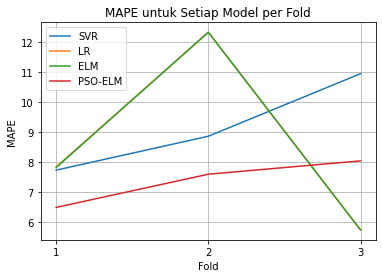

In [ ]:
plt.plot(score_mape["Fold"],score_mape["SVR"])
plt.plot(score_mape["Fold"],score_mape["Linear Regression"])
plt.plot(score_mape["Fold"],score_mape["ELM"])
plt.plot(score_mape["Fold"],score_mape["PSO-ELM"])
plt.legend(["SVR","LR","ELM","PSO-ELM"])
plt.grid()
plt.xlabel("Fold")
plt.xticks([1,2,3])
plt.ylabel("MAPE")
plt.title("MAPE untuk Setiap Model per Fold")

In [ ]:
score_mape = pd.DataFrame()
score_mape["Fold"] = np.arange(0,3)+1
score_mape["SVR"] = svm_rmse
score_mape["Linear Regression"] = lr_rmse
score_mape["ELM"] = elm_rmse
score_mape["PSO-ELM"] = pso_elm_rmse

Text(0.5, 1.0, 'RMSE untuk Setiap Model per Fold')

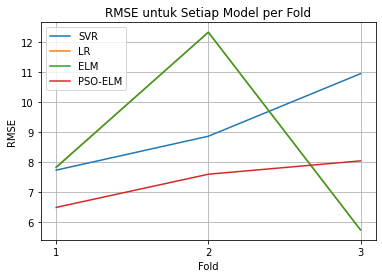

In [ ]:
plt.plot(score_mape["Fold"],score_mape["SVR"])
plt.plot(score_mape["Fold"],score_mape["Linear Regression"])
plt.plot(score_mape["Fold"],score_mape["ELM"])
plt.plot(score_mape["Fold"],score_mape["PSO-ELM"])
plt.legend(["SVR","LR","ELM","PSO-ELM"])
plt.grid()
plt.xlabel("Fold")
plt.xticks([1,2,3])
plt.ylabel("RMSE")
plt.title("RMSE untuk Setiap Model per Fold")